In [204]:
from itertools import count
from statistics import correlation

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:



                                                 # Financial Data Analysis




In [205]:
df = pd.read_csv("C:/Users/Nitesh/OneDrive/Desktop/TOPS TECHNOLOGY/Assessment/Python/finance_economics_dataset.csv")
print(df)

            Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0     2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1     2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2     2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3     2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4     2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   
...          ...         ...         ...          ...         ...        ...   
2995  2008-03-14   Dow Jones     1273.76      1235.44     1317.28    1192.34   
2996  2008-03-15     S&P 500     4589.59      4566.91     4607.56    4545.69   
2997  2008-03-16     S&P 500     1477.52      1448.47     1523.86    1402.69   
2998  2008-03-17      NASDAQ     2311.37      2306.90     2346.30    2282.00   
2999  2008-03-18      NASDAQ     4262.98      4303.82     4316.68    4243.04   

      Trading Volume  GDP Growth (%)  I

In [206]:
#1. what is the shape of the data?

print(df.shape)

#  Data has 3000 Rows and 24 Columns

(3000, 24)


In [207]:
#2. What are the column names and their data types?
print(df.info())
print("\n")
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [208]:
#3. How many unique stock indices are there?
stock_indices = df["Stock Index"].unique()
print(stock_indices)

['Dow Jones' 'S&P 500' 'NASDAQ']


In [209]:
#4.  What is the date range of the dataset?
print((df["Date"].min(),
 df["Date"].max()))


('2000-01-01', '2008-03-18')


In [210]:
#5. Are there any missing values?
print(df.isnull().sum())

# NO, There are no missing values

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [211]:
#6. Are there negative values in columns that should be non-negative?
negative_values = { col: (df[col] < 0).sum()

    for col in df.select_dtypes(include=np.number).columns}

negative_values


{'Open Price': np.int64(0),
 'Close Price': np.int64(0),
 'Daily High': np.int64(0),
 'Daily Low': np.int64(0),
 'Trading Volume': np.int64(0),
 'GDP Growth (%)': np.int64(947),
 'Inflation Rate (%)': np.int64(0),
 'Unemployment Rate (%)': np.int64(0),
 'Interest Rate (%)': np.int64(0),
 'Consumer Confidence Index': np.int64(0),
 'Government Debt (Billion USD)': np.int64(0),
 'Corporate Profits (Billion USD)': np.int64(0),
 'Forex USD/EUR': np.int64(0),
 'Forex USD/JPY': np.int64(0),
 'Crude Oil Price (USD per Barrel)': np.int64(0),
 'Gold Price (USD per Ounce)': np.int64(0),
 'Real Estate Index': np.int64(0),
 'Retail Sales (Billion USD)': np.int64(0),
 'Bankruptcy Rate (%)': np.int64(0),
 'Mergers & Acquisitions Deals': np.int64(0),
 'Venture Capital Funding (Billion USD)': np.int64(0),
 'Consumer Spending (Billion USD)': np.int64(0)}

In [212]:
#7. What is the summary of GDP Growth (%)?

df["GDP Growth (%)"].describe()


count    3000.000000
mean        2.608903
std         4.287337
min        -5.000000
25%        -1.012500
50%         2.725000
75%         6.242500
max        10.000000
Name: GDP Growth (%), dtype: float64

In [214]:
#8.  Are there rows with zero or near-zero trading volume?

print((df["Trading Volume"] <= 1).sum())

# there are no rows with zero or near zero trading volume


0


In [32]:
#9. Are there any duplicate rows?

print(df.duplicated().sum())

# there are no duplicate rows

0


In [215]:
#10. Are there outliers in GDP, Gold, or Oil prices?

outliers = {}

for col in ["GDP Growth (%)",
            "Gold Price (USD per Ounce)",
            "Crude Oil Price (USD per Barrel)"]:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers[col] = ((df[col] < Q1 - 1.5*IQR) |
                     (df[col] > Q3 + 1.5*IQR)).sum()

print(outliers)

""" NO outliers are present"""


{'GDP Growth (%)': np.int64(0), 'Gold Price (USD per Ounce)': np.int64(0), 'Crude Oil Price (USD per Barrel)': np.int64(0)}


' NO outliers are present'

In [216]:
#11. What is the summary of Inflation Rate (%)?

df["Inflation Rate (%)"].describe()

count    3000.000000
mean        5.096830
std         2.910513
min         0.010000
25%         2.607500
50%         5.110000
75%         7.600000
max        10.000000
Name: Inflation Rate (%), dtype: float64

In [217]:
#12. What is the average unemployment rate?

print(df["Unemployment Rate (%)"].mean())

# unemployment rate is 8.67%

8.663786666666667


In [218]:
#13. Which index has the highest trading volume?

print(df.groupby("Stock Index")["Trading Volume"].mean().idxmax())

# S&P 500 has the highest trading volume


S&P 500


In [219]:
#14.  How many stock records are from each index?

print(df.groupby("Stock Index")["Date"].count())

Stock Index
Dow Jones     957
NASDAQ       1007
S&P 500      1036
Name: Date, dtype: int64


In [220]:
#15.  What is the correlation between inflation and interest rate?

correlation = df["Inflation Rate (%)"].corr(df["Interest Rate (%)"])
print(correlation)

0.005732927235576248


In [221]:
#16. What is the average Consumer Confidence Index?

df["Consumer Confidence Index"].mean()

np.float64(85.036)

In [222]:
#17. Which column has the highest standard deviation?

df.std(numeric_only=True).idxmax()


'Trading Volume'

In [224]:
#18. What is the highest gold price recorded?

print(df["Gold Price (USD per Ounce)"].max())

2499.66


In [225]:
#19.  Which date had the highest crude oil price?

df.loc[df["Crude Oil Price (USD per Barrel)"].idxmax(), "Date"]


'2001-11-22'

In [228]:
#20. What is the average corporate profit?

print(df["Corporate Profits (Billion USD)"].mean())


2553.7563333333333


In [ ]:


                                      # Insightful Analysis Questions



In [229]:
#1.  What percentage of the dataset shows negative GDP growth

negative_gdp_percent = (df[df["GDP Growth (%)"] < 0].shape[0] / df.shape[0]) * 100

negative_gdp_percent

# 31.57% of the dataset shows negative growth rate


31.566666666666666

In [230]:
#2. Does high inflation correspond to higher interest rates?

correlation = df["Inflation Rate (%)"].corr(df["Interest Rate (%)"])

print(correlation)

# There is almost no correlation between inflation rate and interest rate in the dataset.

0.005732927235576248


In [231]:
#3.  Is there a relationship between unemployment and consumer spending?

correlation = df["Unemployment Rate (%)"].corr(df["Consumer Spending (Billion USD)"])
print(correlation)



0.018786001938759095


In [232]:
# 4.  Do higher corporate profits align with higher consumer confidence?

correlation = df["Corporate Profits (Billion USD)"].corr(df["Consumer Confidence Index"])
print(correlation)

#

0.01800805588826958


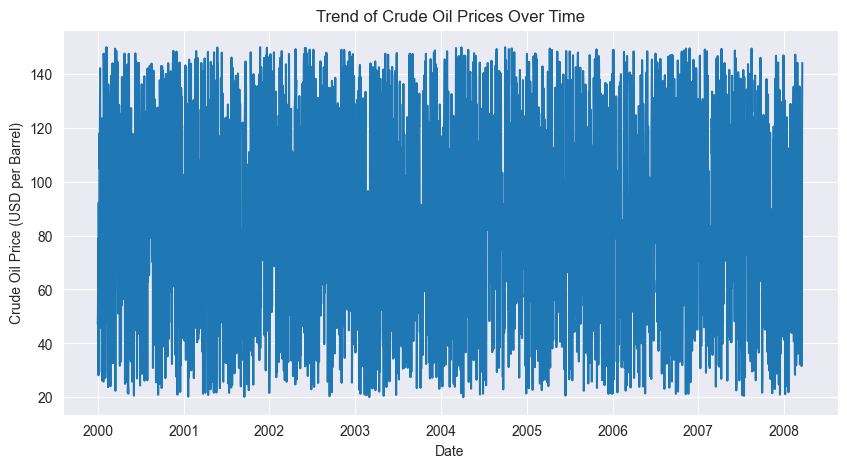

In [233]:
#5. What’s the trend of crude oil prices over time?

import pandas as pd
import matplotlib.pyplot as plt



df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date")


plt.figure(figsize = (10,5))
plt.plot(df["Date"], df["Crude Oil Price (USD per Barrel)"])
plt.xlabel("Date")
plt.ylabel("Crude Oil Price (USD per Barrel)")
plt.title("Trend of Crude Oil Prices Over Time")
plt.show()


In [234]:
#6. Are gold prices inversely related to stock performance?

correlation = df["Gold Price (USD per Ounce)"].corr(df["Close Price"])
print(correlation)



-0.014543960422329251


In [235]:
#7. Does government debt impact consumer confidence?

correlation = df["Government Debt (Billion USD)"].corr(df["Consumer Confidence Index"])
print(correlation)

-0.03637006085825002


In [236]:
#8. How do mergers & acquisitions (M&A) activity correlate with stock index closing prices?

correlation = df["Mergers & Acquisitions Deals"].corr(df["Close Price"])
print(correlation)



0.0026371007894390383


In [237]:
#9. Is retail sales growth associated with GDP growth?

retail_gdp_corr = df["Retail Sales (Billion USD)"].corr(df["GDP Growth (%)"])
print(retail_gdp_corr)


-0.014287611445719921


In [238]:
# 10. Is stock market performance linked to consumer spending?

correlation = df["Close Price"].corr(df["Consumer Spending (Billion USD)"])
print(correlation)

0.0003755593931885114


In [239]:
#11. Which stock index had the highest average closing price?


avg_close = df.groupby("Stock Index")["Close Price"].mean()

highest_avg_index = avg_close.idxmax()
highest_avg_value = avg_close.max()

print(highest_avg_index,highest_avg_value)


Dow Jones 3004.45644723093


In [240]:
#12. What is the relationship between interest rate and unemployment?

correlation = df["Interest Rate (%)"].corr(df["Unemployment Rate (%)"])
print(correlation)

0.018004072130972763


In [27]:
#13. Do lower consumer confidence values coincide with higher bankruptcy rates?

correlation = df["Consumer Confidence Index"].corr(df["Bankruptcy Rate (%)"])
print(correlation)



-0.01631304347909407


In [241]:
#14.  Which indicator has the highest correlation with stock close price?

numeric_cols = df.select_dtypes(include="number")

correlations = numeric_cols.corr()["Close Price"].sort_values(ascending=False)
print(correlations)


Close Price                              1.000000
Daily High                               0.999821
Daily Low                                0.999820
Open Price                               0.999688
Retail Sales (Billion USD)               0.049370
Bankruptcy Rate (%)                      0.029380
Venture Capital Funding (Billion USD)    0.021414
Interest Rate (%)                        0.020434
Trading Volume                           0.016283
Consumer Confidence Index                0.013482
Corporate Profits (Billion USD)          0.008797
Mergers & Acquisitions Deals             0.002637
Crude Oil Price (USD per Barrel)         0.002563
Consumer Spending (Billion USD)          0.000376
Unemployment Rate (%)                   -0.001907
Government Debt (Billion USD)           -0.007332
Inflation Rate (%)                      -0.007972
Real Estate Index                       -0.008639
GDP Growth (%)                          -0.012748
Gold Price (USD per Ounce)              -0.014544


In [242]:
#15.  Are unemployment rates lower when corporate profits are high?

correlation = df["Unemployment Rate (%)"].corr(df["Corporate Profits (Billion USD)"])
print(correlation)

0.00829241418823554


In [ ]:



                                              #  RETAIL SALES ANALYSIS




In [354]:
df1 = pd.read_csv("C:/Users/Nitesh/OneDrive/Desktop/TOPS TECHNOLOGY/Assessment/Python/Retail Data.csv")
print(df1)

     Order No  Order Date           Customer Name  \
0      4293-1  02-09-2014        Vivek Sundaresam   
1      5001-1  24-10-2015          Shahid Hopkins   
2      5004-1  13-03-2014           Dennis Pardue   
3      5009-1  18-02-2013              Sean Wendt   
4      5010-1  13-09-2014  Christina Vanderzanden   
...       ...         ...                     ...   
4995   6831-1  02-11-2016           Roland Murray   
4996   6847-1  16-12-2015          Patrick OBrill   
4997   6922-1  28-09-2016            Troy Staebel   
4998   6939-1  18-06-2016             Shaun Weien   
4999   6980-1  12-08-2015          Nora Pelletier   

                                  Address       City State   Customer Type  \
0          152 Bunnerong Road,Eastgardens     Sydney   NSW  Small Business   
1           438 Victoria Avenue,Chatswood     Sydney   NSW       Corporate   
2                412 Brunswick St,Fitzroy  Melbourne   VIC        Consumer   
3                145 Ramsay St,Haberfield     Sydne

In [244]:
#1. View the structure of the dataset (columns, types, missing values).

print(df1.columns)
print("\n",df1.dtypes)
print("\n",df1.isnull().sum())

Index(['Order No', 'Order Date', 'Customer Name', 'Address', 'City', 'State',
       'Customer Type', 'Account Manager', 'Order Priority', 'Product Name',
       'Product Category', 'Product Container', 'Ship Mode', 'Ship Date',
       'Cost Price', 'Retail Price', 'Profit Margin', 'Order Quantity',
       'Sub Total', 'Discount %', 'Discount $', 'Order Total', 'Shipping Cost',
       'Total'],
      dtype='object')

 Order No              object
Order Date            object
Customer Name         object
Address               object
City                  object
State                 object
Customer Type         object
Account Manager       object
Order Priority        object
Product Name          object
Product Category      object
Product Container     object
Ship Mode             object
Ship Date             object
Cost Price            object
Retail Price          object
Profit Margin         object
Order Quantity       float64
Sub Total             object
Discount %            objec

In [245]:
#2. What is the shape (rows, columns) of the dataset?
print(df1.shape)


(5000, 24)


In [246]:
#3. Are there any duplicate records?\
print(df1.duplicated().sum())

"""No duplicate records"""

0


In [247]:
#4.  Are there any missing or corrupted entries in Ship Date, Order Date, or numeric columns?

print(df1[["Ship Date","Order Date"]].isnull().sum())

# THERE ARE NO MISSING VALUES OR CORRUPTED ENTRIES IN BOTH COLUMNS

Ship Date     0
Order Date    0
dtype: int64


In [248]:
#5.  Convert Order Date and Ship Date to datetime.

df1["Order Date"] = pd.to_datetime(df1["Order Date"], errors="coerce")
df1["Ship Date"] = pd.to_datetime(df1["Ship Date"], errors="coerce")

# Verify the conversion
print(df1[["Order Date", "Ship Date"]].dtypes)

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


In [249]:
#6.  Check for future or inconsistent shipping dates.


df1["Order Date"] = pd.to_datetime(df1["Order Date"], errors="coerce")
df1["Ship Date"] = pd.to_datetime(df1["Ship Date"], errors="coerce")

inconsistent_ship = df1[df1["Ship Date"] < df1["Order Date"]]

print("Number of inconsistent shipping dates (Ship Date < Order Date):")
print(len(inconsistent_ship))

today = pd.Timestamp.today()
future_ship = df1[df1["Ship Date"] > today]

print("\nNumber of future shipping dates:")
print(len(future_ship))

problematic_rows = pd.concat([inconsistent_ship, future_ship]).drop_duplicates()

print("\nSample problematic records:")
print(problematic_rows[["Order Date", "Ship Date"]].head())

Number of inconsistent shipping dates (Ship Date < Order Date):
24

Number of future shipping dates:
0

Sample problematic records:
     Order Date  Ship Date
204  2014-04-09 2014-03-09
764  2014-07-10 2014-02-10
765  2014-06-10 2014-02-10
863  2014-04-10 2014-02-10
1292 2014-12-02 2014-11-02


In [252]:
#7.  Convert price columns to numeric (remove $ and commas).

price_cols = ["Retail Price", "Profit Margin"]

# Convert price columns to numeric
for col in price_cols:
    df1[col] = (
        df1[col]
        .astype(str)                 # ensure string type
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df1[col] = pd.to_numeric(df1[col], errors="coerce")



print(df1[price_cols].dtypes)

Retail Price     float64
Profit Margin    float64
dtype: object


In [253]:
# 8. What are the unique values in Customer Type and Order Priority?

customer_type_unique = df1["Customer Type"].unique()
order_priority_unique = df1["Order Priority"].unique()

print(customer_type_unique)
print(order_priority_unique)

['Small Business' 'Corporate' 'Consumer' 'Home Office']
['Critical' 'Medium' 'Not Specified' 'Low' 'High']


In [254]:
#9. What are the most common shipping modes?

print(df1["Ship Mode"].value_counts())

"Regular Air is the most common shipping mode"

Ship Mode
Regular Air       4236
Express Air        647
Delivery Truck     117
Name: count, dtype: int64


'Regular Air is the most common shipping mode'

In [255]:
# 10. Which cities have the highest number of orders?

df2 = df1.groupby("City")["Order Quantity"].count()
print(df2)

# Melbourne has the highest number(1416) of orders

City
Melbourne    1416
Sydney       3583
Name: Order Quantity, dtype: int64


In [256]:
# 11. What’s the range of order quantities and prices?

min_qty = df1["Order Quantity"].min()
max_qty = df1["Order Quantity"].max()

print(f"Order Quantity Range: {min_qty} to {max_qty}")


min_price = df1["Retail Price"].min()
max_price = df1["Retail Price"].max()

print(f"Price (Sales) Range: {min_price} to {max_price}")


Order Quantity Range: 1.0 to 50.0
Price (Sales) Range: 1.14 to 599.99


In [257]:
# 12. Create a new column for shipping duration.

df1["Shipping Duration"] = df1["Ship Date"] - df1["Order Date"]
print(df1)

     Order No Order Date           Customer Name  \
0      4293-1 2014-02-09        Vivek Sundaresam   
1      5001-1        NaT          Shahid Hopkins   
2      5004-1        NaT           Dennis Pardue   
3      5009-1        NaT              Sean Wendt   
4      5010-1        NaT  Christina Vanderzanden   
...       ...        ...                     ...   
4995   6831-1 2016-02-11           Roland Murray   
4996   6847-1        NaT          Patrick OBrill   
4997   6922-1        NaT            Troy Staebel   
4998   6939-1        NaT             Shaun Weien   
4999   6980-1 2015-12-08          Nora Pelletier   

                                  Address       City State   Customer Type  \
0          152 Bunnerong Road,Eastgardens     Sydney   NSW  Small Business   
1           438 Victoria Avenue,Chatswood     Sydney   NSW       Corporate   
2                412 Brunswick St,Fitzroy  Melbourne   VIC        Consumer   
3                145 Ramsay St,Haberfield     Sydney   NSW  Sma

In [258]:
# 13. Are there any orders with zero or negative total or quantity?

price_cols = ["Order Total"]

for col in price_cols:
    df1[col] = (
        df1[col]
        .astype(str)                 # ensure string type
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df1[col] = pd.to_numeric(df1[col], errors="coerce")


zero_negative_qty = df1[df1["Order Quantity"] <= 0]

print("Orders with zero or negative quantity:")
print(len(zero_negative_qty))

zero_negative_sales = df1[df1["Order Total"] <= 0]

print("\nOrders with zero or negative total (Sales):")
print(len(zero_negative_sales))


Orders with zero or negative quantity:
0

Orders with zero or negative total (Sales):
0


In [352]:
# 14. Are all discount percentages matching discount dollar amounts?

# Clean Discount %
df1["Discount %"] = pd.to_numeric(
    df1["Discount %"].astype(str).str.replace("%", "", regex=False),
    errors="coerce"
)

# Clean Discount $
df1["Discount $"] = pd.to_numeric(
    df1["Discount $"].astype(str).str.replace("[$,]", "", regex=True),
    errors="coerce"
)

# Clean Sub Total
df1["Sub Total"] = pd.to_numeric(
    df1["Sub Total"].astype(str).str.replace("[$,]", "", regex=True),
    errors="coerce"
)

df1["Expected Discount $"] = df1["Sub Total"] * df1["Discount %"] / 100
df1["Discount Match"] = (
    abs(df1["Discount $"] - df1["Expected Discount $"]) <= 1)

df1["Discount Match"].value_counts()



Discount Match
False    3975
True     1025
Name: count, dtype: int64

In [353]:
# 15.  Check for mismatches in total calculation.

cols = ["Sub Total", "Discount $", "Shipping Cost", "Total"]

for col in cols:
    df1[col] = pd.to_numeric(
        df1[col].astype(str).str.replace("[$,]", "", regex=True),
        errors="coerce")

df1["Expected Total"] = (
    df1["Sub Total"] - df1["Discount $"] + df1["Shipping Cost"]
)

df1["Total Match"] = (
    abs(df1["Total"] - df1["Expected Total"]) <= 1
)

df1["Total Match"].value_counts()



Total Match
False    3235
True     1765
Name: count, dtype: int64

In [261]:
# 16.  Identify top 5 products by order quantity.

print("Top 5 Products by Total Order Quantity:\n")
df1.groupby('Product Name')['Order Quantity'].sum().sort_values(ascending=False).head()



Top 5 Products by Total Order Quantity:



Product Name
Artisan 474 Labels                         3395.0
Smiths General Use 3-Ring Binders          3220.0
Artisan 479 Labels                         3039.0
Artisan 481 Labels                         2996.0
Apex Preferred Stainless Steel Scissors    2896.0
Name: Order Quantity, dtype: float64

In [263]:
# 17. Which Account Manager handled the most revenue?


revenue_by_manager = df1.groupby('Account Manager')['Order Total'].sum().reset_index()

top_managers = revenue_by_manager.sort_values(by='Order Total', ascending=False)

top_5 = top_managers.head(5)

print("Top 5 Account Managers by Total Revenue:\n")
print(top_5.to_string(index=False))

# Identify the one with the most revenue
top_manager = top_5.iloc[0]
print(f"\nAccount Manager who handled the most revenue: {top_manager['Account Manager']}")
print(f"Total Revenue: ${top_manager['Order Total']:,.2f}")

Top 5 Account Managers by Total Revenue:

Account Manager  Order Total
   Connor Betts    746122.56
   Tina Carlton    447203.42
    Yvette Biti    388451.58
Samantha Chairs    282291.69
    Mihael Khan    280690.79

Account Manager who handled the most revenue: Connor Betts
Total Revenue: $746,122.56


In [264]:
#18.  What is the average shipping cost by mode?

price_cols = ["Shipping Cost"]
for col in price_cols:
    df1[col] = (
        df1[col]
        .astype(str)                 # ensure string type
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df1[col] = pd.to_numeric(df1[col], errors="coerce")

df1.groupby('Ship Mode')['Shipping Cost'].mean()


Ship Mode
Delivery Truck    5.270085
Express Air       5.247311
Regular Air       5.503553
Name: Shipping Cost, dtype: float64

In [265]:
# 19. Find the most profitable product.

most_profitable_product = df1.groupby("Product Name")["Profit Margin"].mean()
# print(most_profitable_product)

most_profitable_product_name = most_profitable_product.idxmax()

print("Most profitable product:", most_profitable_product_name)


Most profitable product: 3wax Printer


In [266]:
# 20. Find the most profitable product.

most_profitable_product = df1.groupby("Product Name")["Profit Margin"].mean()
# print(most_profitable_product)

most_profitable_product_name = most_profitable_product.idxmax()

print("Most profitable product:", most_profitable_product_name)

Most profitable product: 3wax Printer


In [128]:


                                                # Insightful Analysis Questions


In [277]:
import pandas as pd


df1 = pd.read_csv("C:/Users/Nitesh/OneDrive/Desktop/TOPS TECHNOLOGY/Assessment/Python/Retail Data.csv")
print(df1)

     Order No  Order Date           Customer Name  \
0      4293-1  02-09-2014        Vivek Sundaresam   
1      5001-1  24-10-2015          Shahid Hopkins   
2      5004-1  13-03-2014           Dennis Pardue   
3      5009-1  18-02-2013              Sean Wendt   
4      5010-1  13-09-2014  Christina Vanderzanden   
...       ...         ...                     ...   
4995   6831-1  02-11-2016           Roland Murray   
4996   6847-1  16-12-2015          Patrick OBrill   
4997   6922-1  28-09-2016            Troy Staebel   
4998   6939-1  18-06-2016             Shaun Weien   
4999   6980-1  12-08-2015          Nora Pelletier   

                                  Address       City State   Customer Type  \
0          152 Bunnerong Road,Eastgardens     Sydney   NSW  Small Business   
1           438 Victoria Avenue,Chatswood     Sydney   NSW       Corporate   
2                412 Brunswick St,Fitzroy  Melbourne   VIC        Consumer   
3                145 Ramsay St,Haberfield     Sydne

In [269]:
# 1. What is the total revenue generated across all orders?

price_cols = ["Total"]
for col in price_cols:
    df1[col] = (
        df1[col]
        .astype(str)                 # ensure string type
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df1[col] = pd.to_numeric(df1[col], errors="coerce")


total_revenue = df1["Total"].sum()
print(total_revenue)

3731536.4000000004


In [270]:
# 2. Which customer type generates more revenue?

price_cols = ["Order Total"]
for col in price_cols:
    df1[col] = (
        df1[col]
        .astype(str)                 # ensure string type
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df1[col] = pd.to_numeric(df1[col], errors="coerce")

customer_revenue = df1.groupby('Customer Type')['Order Total'].sum().sort_values(ascending=False)
print(customer_revenue)


""" Corporate generates more revenue than any other customer types"""

Customer Type
Corporate         1352669.38
Home Office        871795.73
Small Business     849685.95
Consumer           734848.79
Name: Order Total, dtype: float64


' Corporate generates more revenue than any other customer types'

In [348]:
# 3.  How does order priority affect revenue?

revenue_by_priority = (
    df1.groupby("Order Priority")["Total"]
    .sum()
    .sort_values(ascending=False)
)

print(revenue_by_priority)


Order Priority
Not Specified    817844.66
High             794199.00
Medium           784744.63
Critical         694547.97
Low              640200.14
Name: Total, dtype: float64


In [284]:
# 4. What is the average profit margin by product category?

df1["Profit Margin"] = pd.to_numeric(
    df1["Profit Margin"].str.replace("[$,]", "", regex=True),
    errors="coerce"
)


avg_profit_margin = df1.groupby("Product Category")["Profit Margin"].mean().reset_index()
print(avg_profit_margin)

  Product Category  Profit Margin
0        Furniture      12.701953
1  Office Supplies      17.682609
2       Technology      20.423208


In [285]:
# 5. What is the most profitable product overall?

most_profitable_product =df1.groupby('Product Name')['Profit Margin'].sum().idxmax()
print("Most profitable product:", most_profitable_product)


Most profitable product: Cando PC940 Copier


In [346]:
# 6. How many days does it usually take to ship an order?

df1["Ship Date"] = pd.to_datetime(df1["Ship Date"],dayfirst=True)
df1["Order Date"] = pd.to_datetime(df1["Order Date"],dayfirst=True)

df1["Shipping Duration"] = df1["Ship Date"] - df1["Order Date"]

avg_shipping_time = df1["Shipping Duration"].mean()
print(avg_shipping_time)

print("It usually takes 1 day to ship an order")

1 days 20:03:15.840000
It usually takes 1 day to ship an order


In [345]:
# 7. Do longer shipping times impact profit margins?

correlation = df1["Shipping Duration"].corr(df1["Profit Margin"])
print(correlation)

print("YEs, longer shipping times hurt profit margin")

-0.01978703518675127
YEs, longer shipping times hurt profit margin


In [343]:
# 8. Which city brings in the highest revenue?

print(df1.groupby("City")["Total"].sum())

print(df1.groupby("City")["Total"].sum().idxmax())

print("\nSydney brings in highest revenue")


City
Melbourne    1052756.07
Sydney       2678780.33
Name: Total, dtype: float64
Sydney

Sydney brings in highest revenue


In [344]:
# 9. Which account manager generated the most revenue?

print(df1.groupby("Account Manager")["Total"].sum())   # to see if it actually generates highest revenue
print()
print(df1.groupby("Account Manager")["Total"].sum().idxmax())

print("Conner Betts generated highest revenue")

Account Manager
Aanya Zhang           241344.03
Charlie Bui           138153.12
Charlie Buo                5.07
Connor Betts          671173.17
Eanya Zhang              240.69
Leighton Forrest      216736.14
Mihael Khan           281948.64
Natasha Song          242718.26
Nicholas Fernandes    305927.88
Oanya Zhang               73.57
Phoebe Gour           249340.81
Preston Senome        199052.07
Radhya Staples         61519.53
Samantha Chairs       273750.35
Simantha Chairs           55.12
Stevie Bacata          15879.22
Tina Carlton          453891.62
Wicholas Fernandes        39.99
Yvette Biti           379687.12
Name: Total, dtype: float64

Connor Betts
Conner Betts generated highest revenue


In [319]:
# 10.  Which shipping mode is most cost-effective (lowest avg. shipping)?

print(df1.groupby("Ship Mode")["Total"].mean())
print()
print(df1.groupby("Ship Mode")["Total"].mean().idxmin())


Ship Mode
Delivery Truck    607.649573
Express Air       693.945456
Regular Air       758.134724
Name: Total, dtype: float64

Delivery Truck


In [322]:
# 11.  Do higher discounts reduce profits?

"""df1["Discount $"] = pd.to_numeric(
    df1["Discount $"].str.replace("[$,]", "", regex=True),
    errors="coerce"
)"""

correlation= df1["Discount $"].corr(df1["Profit Margin"])
print(correlation)

print(f"Yes, longer shipping times hurt profit margin but not that much")

0.39349726173151367
Yes, longer shipping times hurt profit margin but not that much


In [329]:
# 12. Which state has the highest number of orders?

print(df1.groupby("State")["Order Quantity"].count())
print()
print(df1.groupby("State")["Order Quantity"].count().idxmax())


print("NSW has the highest number(3583) of orders")


State
NSW    3583
VIC    1416
Name: Order Quantity, dtype: int64

NSW
NSW has the highest number(3583) of orders


In [330]:
# 13. What is the average discount % across all orders?

print(df1["Discount $"].mean())

print("Average discount across all orders is 49.43")

49.4329
Average discount across all orders is 49.43


In [333]:
# 14. What is the average total spend per order?

avg_spending = df1["Total"].mean()
print(avg_spending)
print(f"Average total spending per order is {avg_spending}")

746.3072800000001
Average total spending per order is 746.3072800000001


In [338]:
# 15. . Are certain containers (e.g., Small Box, Wrap Bag) more profitable?

container_profit = (
    df1.groupby("Product Container")["Profit Margin"]
    .mean()
    .sort_values(ascending=False)
)

print(container_profit)

print("\nSmall Box Containers have more profit margin. So yes, certain containers are more profitable")


Product Container
Small Box     19.668452
Small Pack    16.836970
Jumbo Drum    16.483419
Wrap Bag      16.407018
Medium Box    15.637523
Large Box     11.637730
Name: Profit Margin, dtype: float64

Small Box Containers have more profit margin. So yes, certain containers are more profitable
